In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_parquet("mnt-wl_data.parquet")
df

,M1RigidBodyMotions,M2RigidBodyMotions,OSSGIR6d,OSSPayloads6D,EncAvg
0,"[-9.830697037833977e-15, -3.122389979335907e-1...","[5.885044081528107e-12, -2.161688566692822e-11...","[-1.9210839207027155e-12, 9.737166801468019e-1...","[1.74052288889941e-11, 4.6898110802823855e-12,...","[0.0, 0.0, 0.0]"
1,"[-1.9169269967402688e-09, -6.459566338616824e-...","[-4.477346762723977e-08, 2.429892811244072e-08...","[2.220199048832797e-08, -2.2550794015969068e-0...","[6.459373721091803e-10, 9.332346636411462e-10,...","[-1.0569402671361039e-11, -8.958846528134562e-..."
2,"[-1.8954348080142897e-09, -6.464551853200166e-...","[-4.4709101179547264e-08, 2.4135405989671874e-...","[2.2172699376795545e-08, -2.2519374789164382e-...","[7.064583885579396e-10, 9.304691729370514e-10,...","[-5.0900348449713045e-11, 4.349148599587277e-1..."
3,"[-1.7939226731621686e-09, -6.469799094391376e-...","[-4.4456639383955733e-08, 2.3878057697862338e-...","[2.2046073527924727e-08, -2.2344614033812032e-...","[7.874867683996118e-10, 8.72137943568981e-10, ...","[-9.654890218409536e-11, 8.50079196374062e-12,..."
4,"[-1.572668772033784e-09, -6.4693080002950616e-...","[-4.3927486685013454e-08, 2.3493929587306744e-...","[2.177605490633997e-08, -2.1955367030195998e-0...","[8.966487695595294e-10, 7.183579269254193e-10,...","[-1.5200130166702153e-10, -3.1118457325781646e..."
...,...,...,...,...,...
39995,"[-8.505528929155188e-07, 3.380919143480371e-06...","[-6.928774837789425e-06, -2.5388885868606496e-...","[-5.416502391311378e-07, 8.89870415724251e-08,...","[-4.829955864310227e-07, 3.1400874979685e-07, ...","[-8.996411258525164e-09, 1.5455656938645135e-0..."
39996,"[-8.53914557142654e-07, 3.3795426800393792e-06...","[-6.940426025293745e-06, -2.5382347445389623e-...","[-5.416294429431979e-07, 9.142815369665203e-08...","[-4.834209354359086e-07, 3.156009763797231e-07...","[-9.040365145274623e-09, 1.510721978789373e-08..."
39997,"[-8.572786200300792e-07, 3.37818357635979e-06,...","[-6.952193273418279e-06, -2.537569032365972e-0...","[-5.415725450824315e-07, 9.385668168286626e-08...","[-4.838390145428518e-07, 3.1719328985215857e-0...","[-9.084512913070683e-09, 1.4757437404534698e-0..."
39998,"[-8.606200160226876e-07, 3.3766261651304727e-0...","[-6.963958919615291e-06, -2.5368291417735905e-...","[-5.414741055472183e-07, 9.627804633920093e-08...","[-4.84243326180576e-07, 3.1864916546010083e-07...","[-9.12912588451728e-09, 1.4406072498970592e-08..."


In [3]:
t = np.arange(len(df))/1000
m1_rbm = np.vstack(df["M1RigidBodyMotions"])
m2_rbm = np.vstack(df["M2RigidBodyMotions"])
mnt_enc_avg = np.vstack(df["EncAvg"])
gir_mean = np.vstack(df["OSSGIR6d"])
#dg_6d = np.vstack(df["OSSPayloads6D"])

Mount motion

Text(0.5, 0, 'Time [s]')

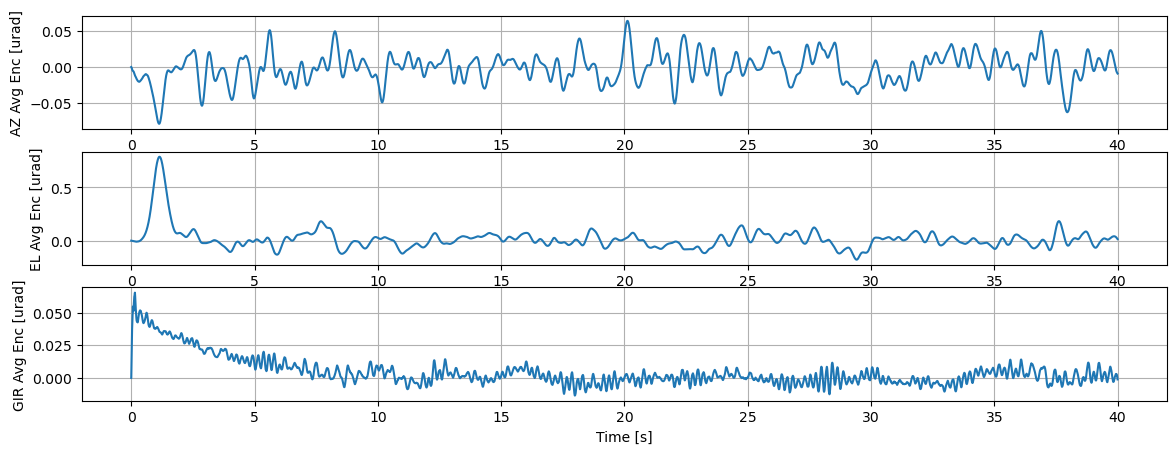

In [4]:
i1,i2 = 0, 39999#14999, 24000
fig,[ax1,ax2,ax3] = plt.subplots(3,1, figsize=(14,5))
ax1.plot(t[i1:i2],mnt_enc_avg[i1:i2,0]*1e6,label="AZ enc AVG")
ax1.grid()
ax1.set_ylabel("AZ Avg Enc [urad]")
ax2.plot(t[i1:i2],mnt_enc_avg[i1:i2,1]*1e6,label="EL enc AVG")
ax2.grid()
ax2.set_ylabel("EL Avg Enc [urad]")
ax3.plot(t[i1:i2],mnt_enc_avg[i1:i2,2]*1e6,label="GIR enc AVG")
ax3.grid()
ax3.set_ylabel("GIR Avg Enc [urad]")
ax3.set_xlabel("Time [s]")

M1-S7 and GIR RBM comparisons

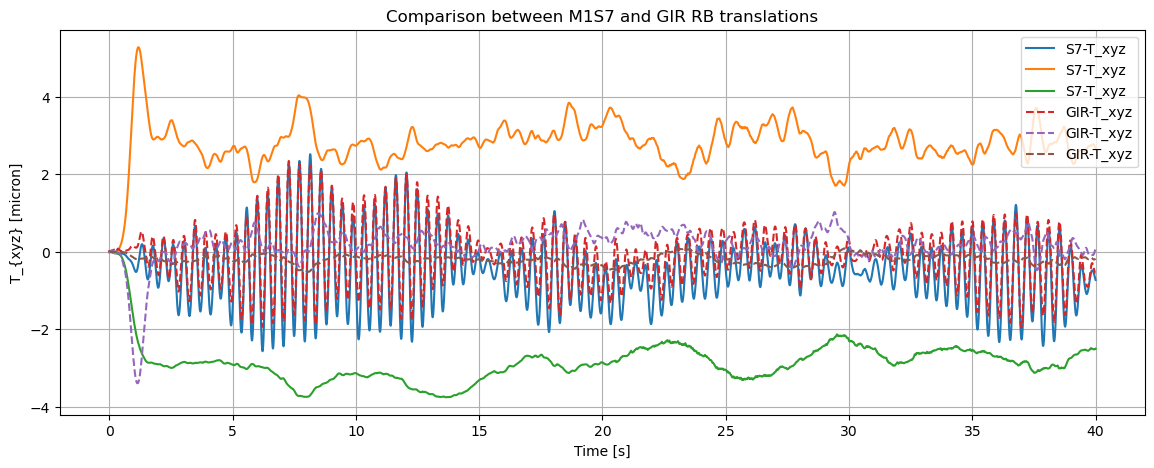

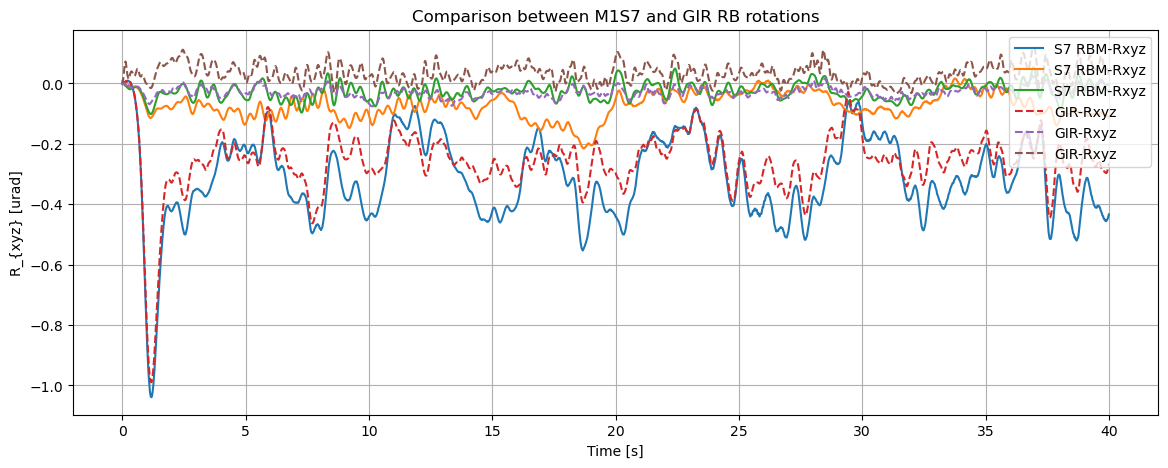

In [5]:
i1,i2 = 0, 39999#14999, 24000
fig,ax = plt.subplots(figsize=(14,5))
ax.plot(t[i1:i2],m1_rbm[i1:i2,36:39]*1e6,label="S7-T_xyz")
ax.plot(t[i1:i2],gir_mean[i1:i2,:3]*1e6,'--',label="GIR-T_xyz")
ax.grid()
ax.set_title("Comparison between M1S7 and GIR RB translations")
ax.set_xlabel("Time [s]")
ax.set_ylabel("T_{xyz} [micron]")
ax.legend(loc="upper right")

fig,ax = plt.subplots(figsize=(14,5))
ax.plot(t[i1:i2],m1_rbm[i1:i2,39:]*1e6,label="S7 RBM-Rxyz")
ax.plot(t[i1:i2],gir_mean[i1:i2,3:]*1e6,'--',label="GIR-Rxyz")
ax.grid()
ax.set_title("Comparison between M1S7 and GIR RB rotations")
ax.set_xlabel("Time [s]")
ax.set_ylabel("R_{xyz} [urad]")
ax.legend(loc="upper right")

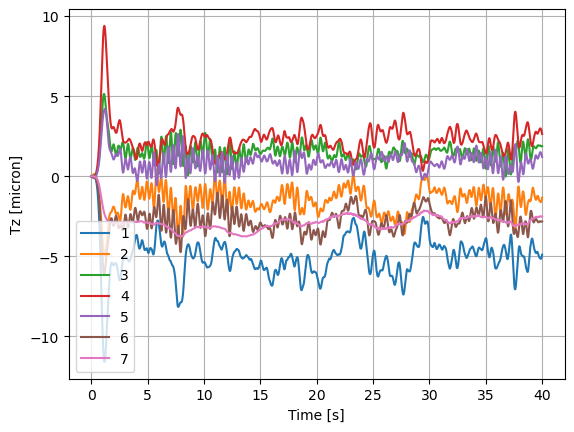

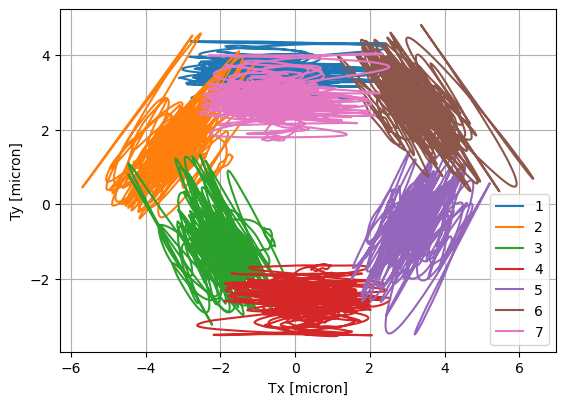

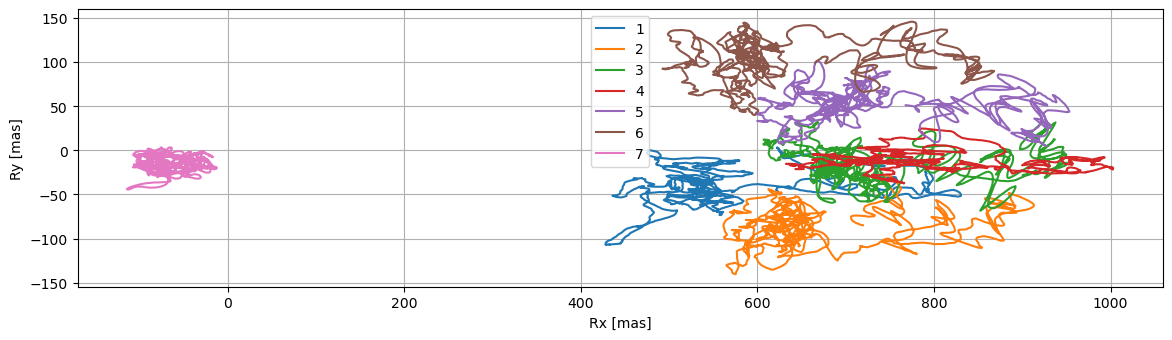

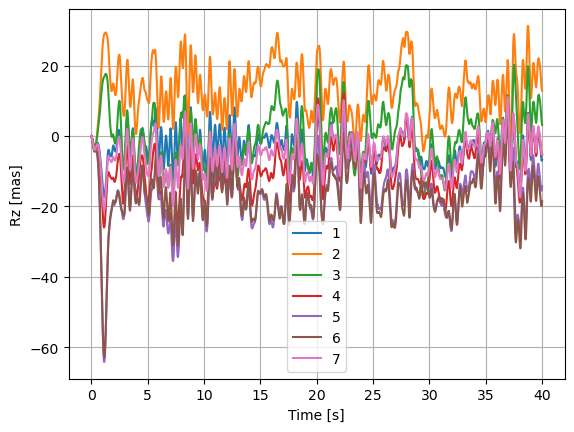

In [6]:
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(t,m1_rbm[:,i*6+2]*1e6,label=i+1);
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Tz [micron]")
ax.legend()
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(m1_rbm[5000:,i*6]*1e6,m1_rbm[5000:,i*6+1]*1e6,label=i+1);
ax.grid()
ax.set_aspect("equal")
ax.set_xlabel("Tx [micron]")
ax.set_ylabel("Ty [micron]")
ax.legend()
fig,ax = plt.subplots(figsize=(14,7))
a = 180*3600e3/np.pi
for i in range(7):
    ax.plot(m1_rbm[5000:,i*6+3]*a,m1_rbm[5000:,i*6+4]*a,label=i+1);
ax.grid()
ax.set_aspect("equal")
ax.set_xlabel("Rx [mas]")
ax.set_ylabel("Ry [mas]")
ax.legend()
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(t,m1_rbm[:,i*6+5]*a,label=i+1);
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Rz [mas]")
ax.legend()

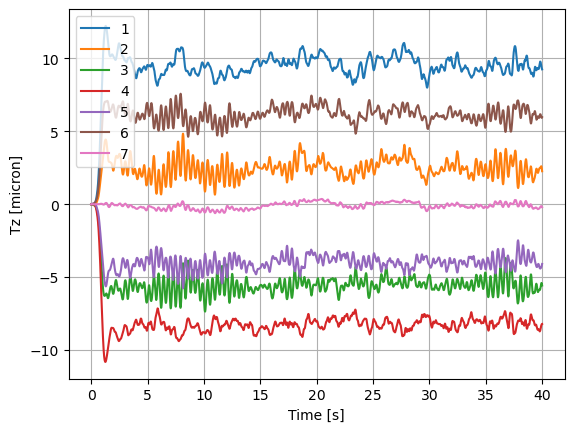

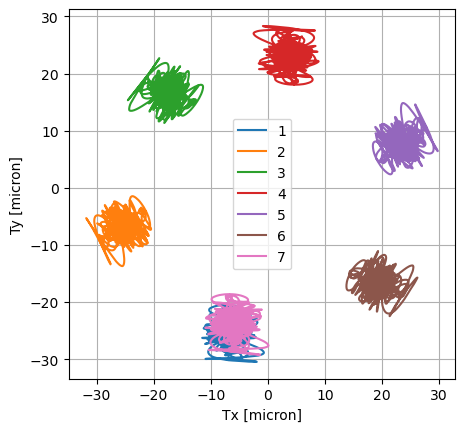

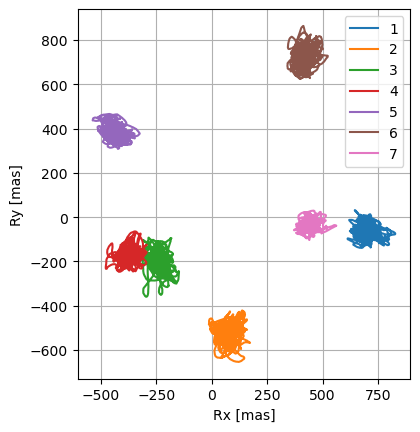

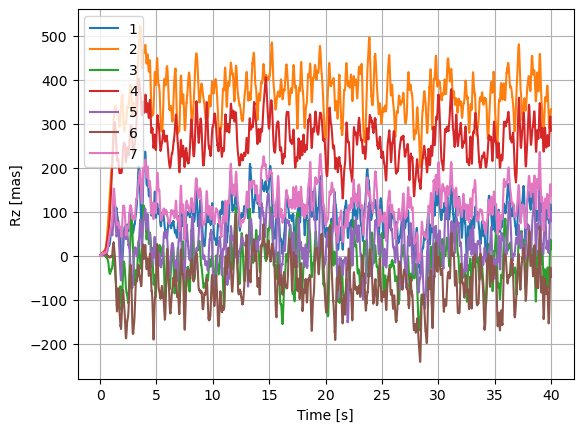

In [7]:
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(t,m2_rbm[:,i*6+2]*1e6,label=i+1);
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Tz [micron]")
ax.legend()
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(m2_rbm[5000:,i*6]*1e6,m2_rbm[5000:,i*6+1]*1e6,label=i+1);
ax.grid()
ax.set_aspect("equal")
ax.set_xlabel("Tx [micron]")
ax.set_ylabel("Ty [micron]")
ax.legend()
fig,ax = plt.subplots()
a = 180*3600e3/np.pi
for i in range(7):
    ax.plot(m2_rbm[5000:,i*6+3]*a,m2_rbm[5000:,i*6+4]*a,label=i+1);
ax.grid()
ax.set_aspect("equal")
ax.set_xlabel("Rx [mas]")
ax.set_ylabel("Ry [mas]")
ax.legend()
fig,ax = plt.subplots()
for i in range(7):
    ax.plot(t,m2_rbm[:,i*6+5]*a,label=i+1);
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Rz [mas]")
ax.legend()

M1 RBM with pointing error compensation

In [8]:
Hk_dt = loadmat('Hk_m1m2.mat')

In [9]:

if False:
    Hk_m1 = Hk_dt['Hk_gir_m1m2'][:42,:]
    print('Dimension of M1 compensation for GIR POS:',Hk_m1.shape)
    u = gir_6d

else:
    Hk_m1 = Hk_dt['Hk_mnt_m1m2'][:42,:]
    print('Dimension of M1 compensation for mount ENC pos:',Hk_m1.shape)
    u = mnt_enc_avg
m1_rbm_c = m1_rbm - (Hk_m1[:,:] @ u[:,:].transpose()).transpose()
#Hk_m1[1,2:5]

Dimension of M1 compensation for mount ENC pos: (42, 3)


Text(0.5, 1.0, 'M1 Rz comparison without pointing error contribution')

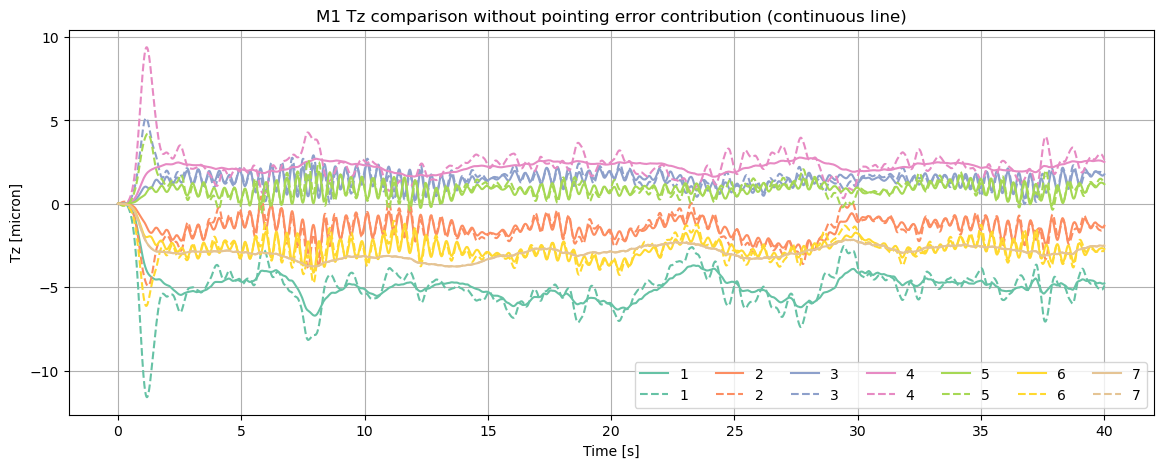

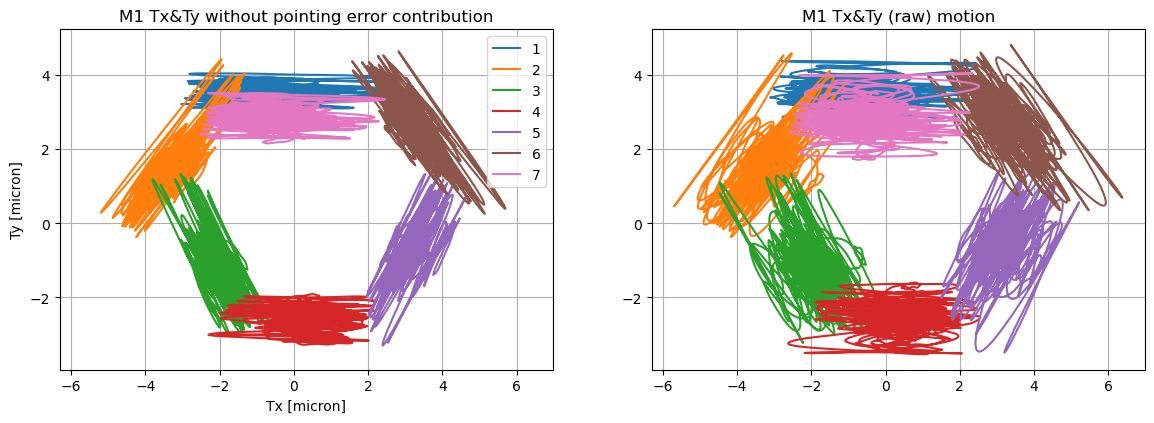

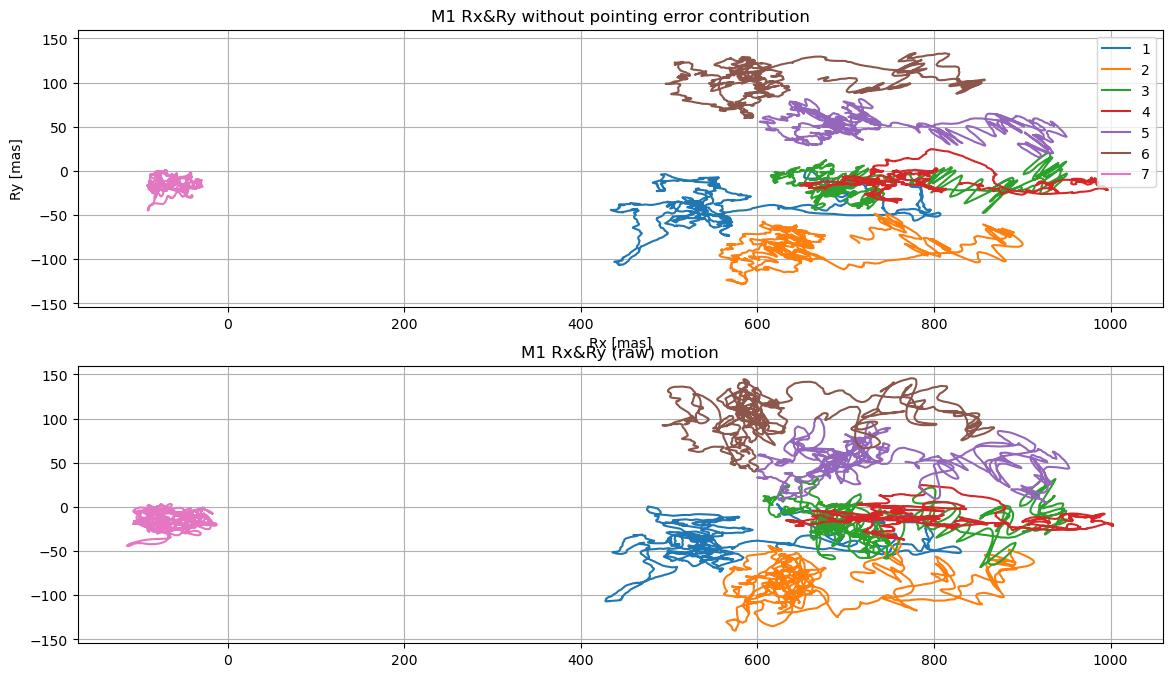

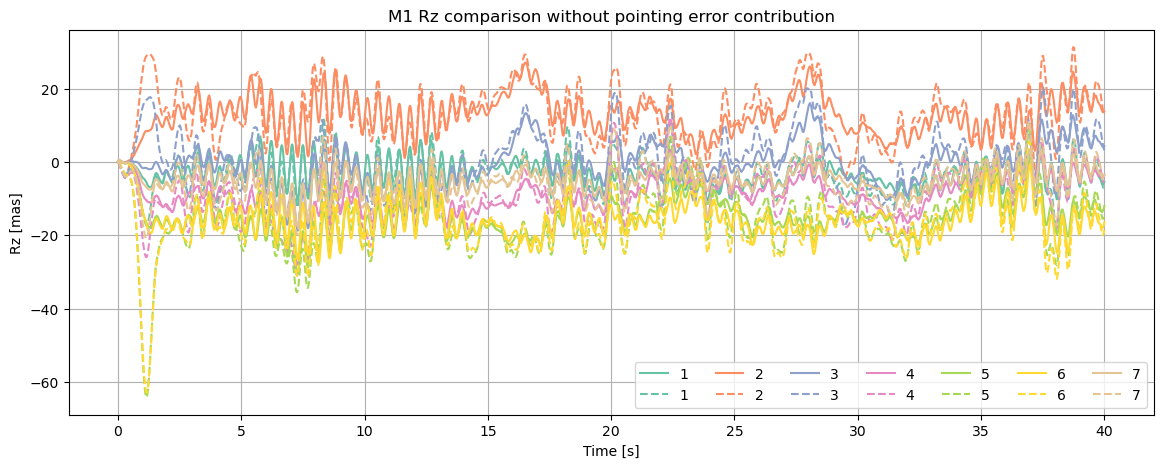

In [10]:
cmap = plt.cm.Set2
fig, ax = plt.subplots(figsize=(14,5))

for i in range(7):
    ax.plot(t,m1_rbm_c[:,i*6+2]*1e6,color = cmap(i/7),label=i+1)
    ax.plot(t,m1_rbm[:,i*6+2]*1e6,'--',color = cmap(i/7),label=i+1)
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Tz [micron]")
ax.set_title("M1 Tz comparison without pointing error contribution (continuous line)")
ax.legend(ncol=7, loc="lower right")

fig,(ax,ax1) = plt.subplots(1,2,figsize=(14,5))
for i in range(7):
    ax.plot(m1_rbm_c[5000:,i*6]*1e6,m1_rbm_c[5000:,i*6+1]*1e6,label=i+1)
    ax1.plot(m1_rbm[5000:,i*6]*1e6,m1_rbm[5000:,i*6+1]*1e6,label=i+1)
ax.grid(), ax1.grid()
ax.set_aspect("equal"), ax1.set_aspect("equal")
ax.set_xlabel("Tx [micron]")
ax.set_ylabel("Ty [micron]")
ax.set_xlim(ax1.get_xlim()), ax.set_ylim(ax1.get_ylim())
ax.legend(loc="upper right")
ax1.set_title("M1 Tx&Ty (raw) motion")
ax.set_title("M1 Tx&Ty without pointing error contribution")

fig,(ax,ax1) = plt.subplots(2,1,figsize=(14,8))
a = 180*3600e3/np.pi
for i in range(7):
    ax.plot(m1_rbm_c[5000:,i*6+3]*a,m1_rbm_c[5000:,i*6+4]*a,label=i+1)
    ax1.plot(m1_rbm[5000:,i*6+3]*a,m1_rbm[5000:,i*6+4]*a,label=i+1)
ax.grid(), ax1.grid()
ax.set_aspect("equal"), ax1.set_aspect("equal")
ax.set_xlim(ax1.get_xlim()), ax.set_ylim(ax1.get_ylim())
ax.set_xlabel("Rx [mas]")
ax.set_ylabel("Ry [mas]")
ax.legend(loc="upper right")
ax1.set_title("M1 Rx&Ry (raw) motion")
ax.set_title("M1 Rx&Ry without pointing error contribution")

fig, ax = plt.subplots(figsize=(14,5))
for i in range(7):
    ax.plot(t,m1_rbm_c[:,i*6+5]*a, color = cmap(i/7),label=i+1)
    ax.plot(t,m1_rbm[:,i*6+5]*a, '--', color = cmap(i/7),label=i+1)
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Rz [mas]")
ax.legend(ncol = 7, loc="lower right")
ax.set_title("M1 Rz comparison without pointing error contribution")